In [1]:
from sklearn.datasets import load_boston

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=load_boston()

In [6]:
dataset=pd.DataFrame(df.data)

In [7]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
dataset.columns=df.feature_names

In [9]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
dataset["price"]=df.target

In [14]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

# Linear Regression


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
mse=cross_val_score(lr,x,y,scoring="neg_mean_squared_error",cv=6)
mean_mse=np.mean(mse)
mean_mse

-39.117136301064455

# Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[2,3,50,10,20,52,1,4,14,7]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=6)
lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 2}
-36.56612009198495


# Ridge Regression

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[2,5,8,3,4,6,4,2,41,25]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=6)
ridge_regressor.fit(x,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 41}
-32.95774627050465


# train_test_split

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)

<AxesSubplot:xlabel='price', ylabel='Density'>

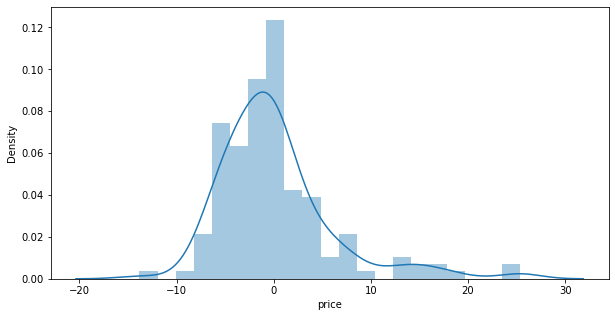

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-prediction_lasso)

<AxesSubplot:xlabel='price', ylabel='Density'>

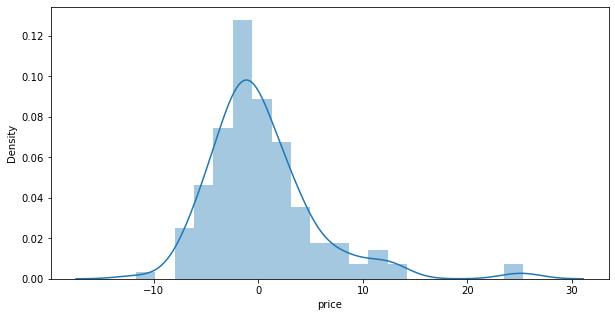

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-prediction_ridge)